In [15]:
# Step 1: Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: CSV file load
df = pd.read_csv('../data/netflix_titles.csv')
df.head()  #first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
# Exploring Data
#Checking Data Size
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# checking column names and its types
df.info()

Rows: 8807
Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
#checking Missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
#If country, director, or date_added is missing then add it or drop it:

df['country'] = df['country'].fillna('Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [21]:
#clean data and create new features

# Find Year
df['year_added'] = df['date_added'].dt.year

# Movie = 1, TV Show = 0
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

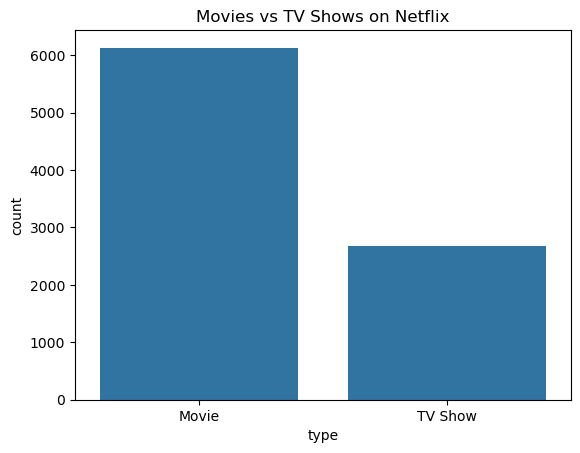

In [22]:
#Visualization, Create Charts
#Chart 1: Movies vs TV Shows
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.savefig('../images/movies_vs_shows.png')  # Save the chart
plt.show()

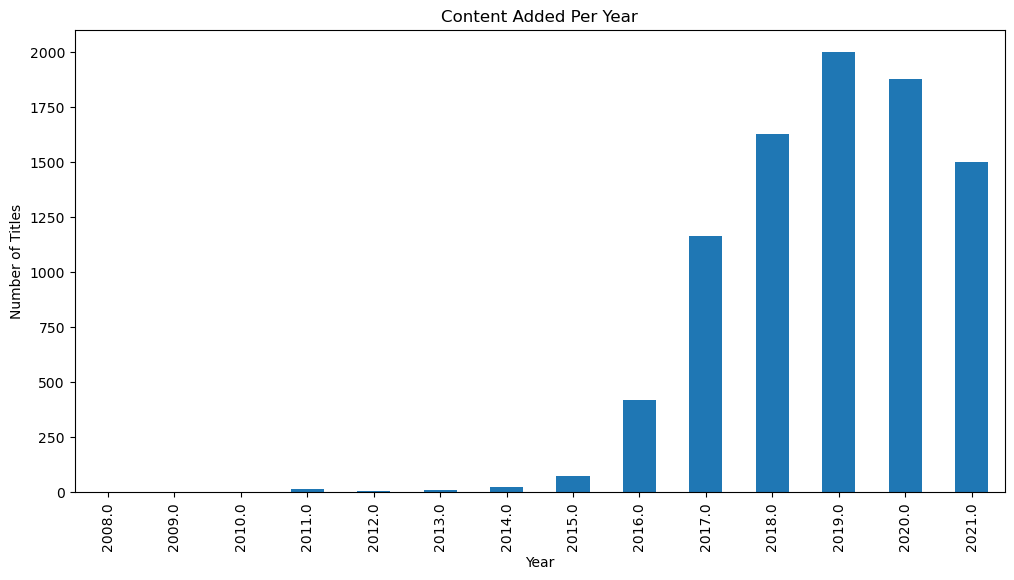

In [23]:
#Chart 2: Content added per year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.savefig('../images/yearly_additions.png')
plt.show()

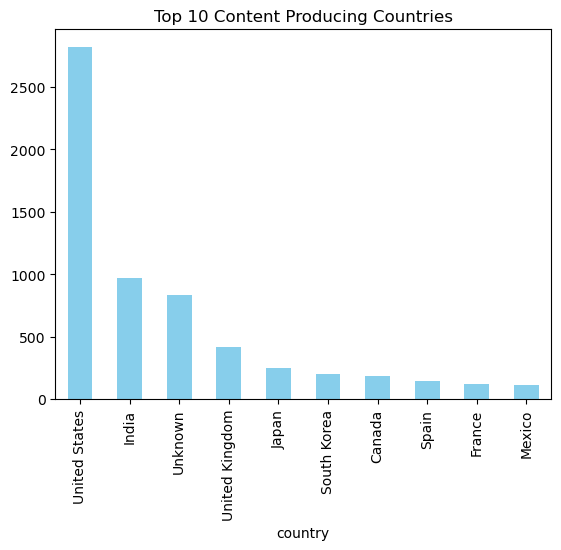

In [24]:
#Chart 3: Top 10 Countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Content Producing Countries")
plt.savefig('../images/top_countries.png')
plt.show()

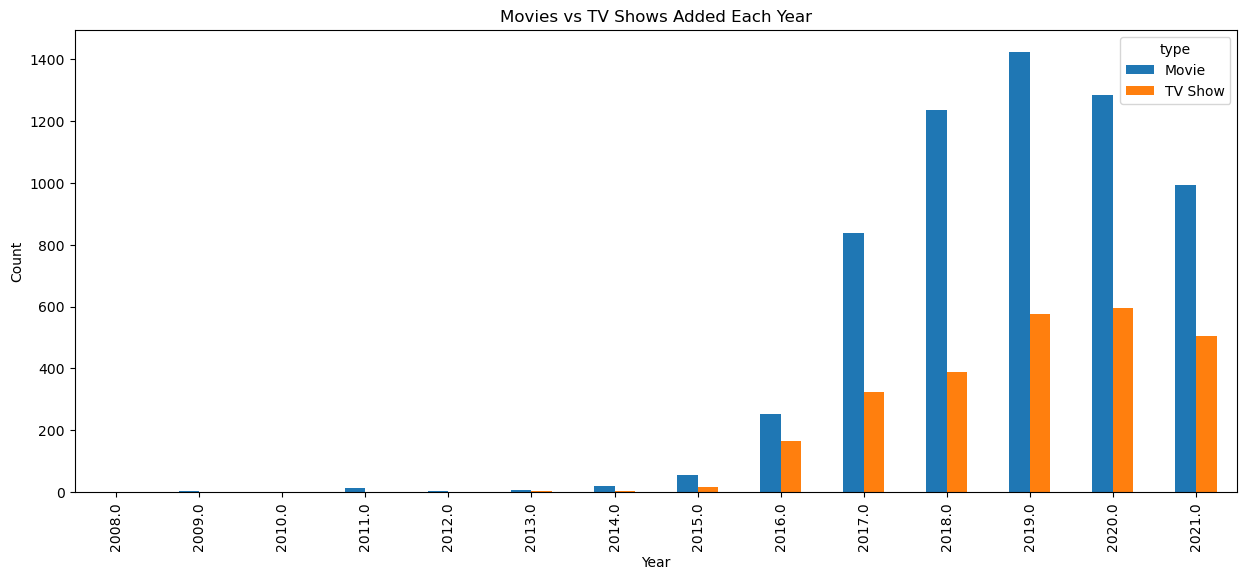

In [29]:
#Chart 4: TV Shows vs Movies Over the Years (Grouped Bar Plot)

# Group by year and type
type_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

type_year.plot(kind='bar', stacked=False, figsize=(15,6))
plt.title('Movies vs TV Shows Added Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('../images/movies_vs_shows_overtheyears.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18316\1314094552.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='cubehelix')


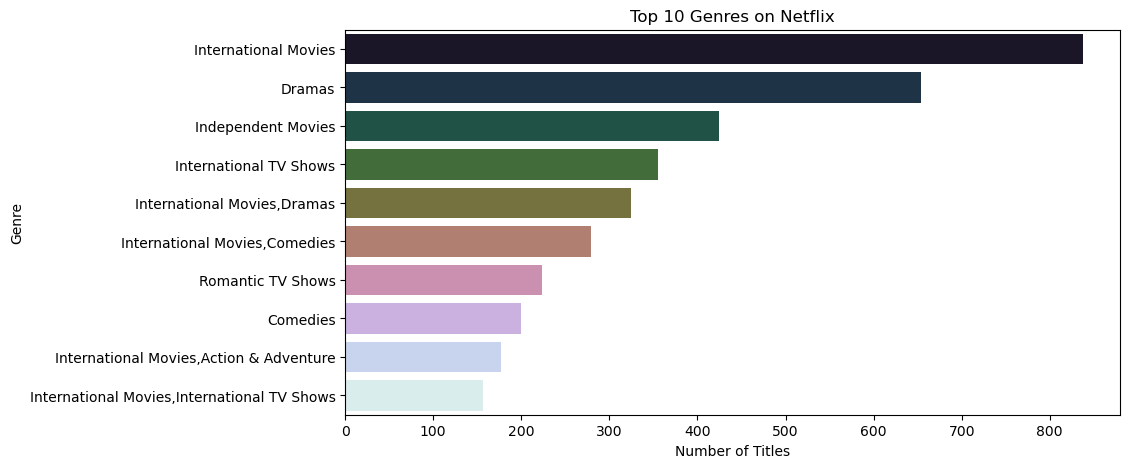

In [32]:
#Chart 5: Genre Popularity (Top 10)
# Split the genres (multiple genres per title), flatten, and count
from collections import Counter

all_genres = ','.join(df['listed_in'].dropna()).split(', ')
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), palette='cubehelix')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.savefig('../images/genre_popularity.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18316\322396162.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


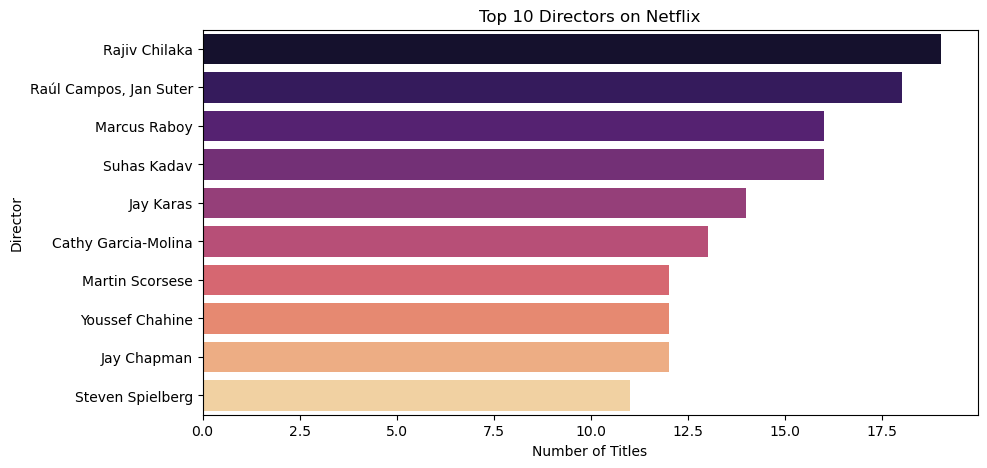

In [34]:
#Chart 6: Director-wise Content Count (Top 10)

top_directors = df['director'].value_counts().drop('Not Given', errors='ignore').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.savefig('../images/director_wise_count.png')
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18316\1479992464.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)


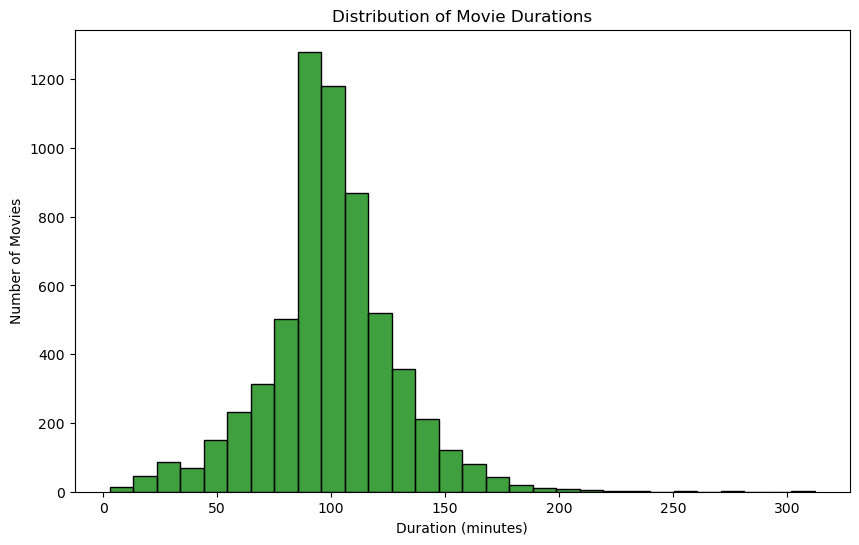

In [35]:
#Chart 7: Duration of Movies (Histogram) only for Movies:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.histplot(movies['duration_int'], bins=30, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.savefig('../images/duration_of_movies.png')
plt.show()

In [38]:
#Chart 8: Word Cloud of Titles (Bonus – Needs wordcloud package)
!pip install wordcloud

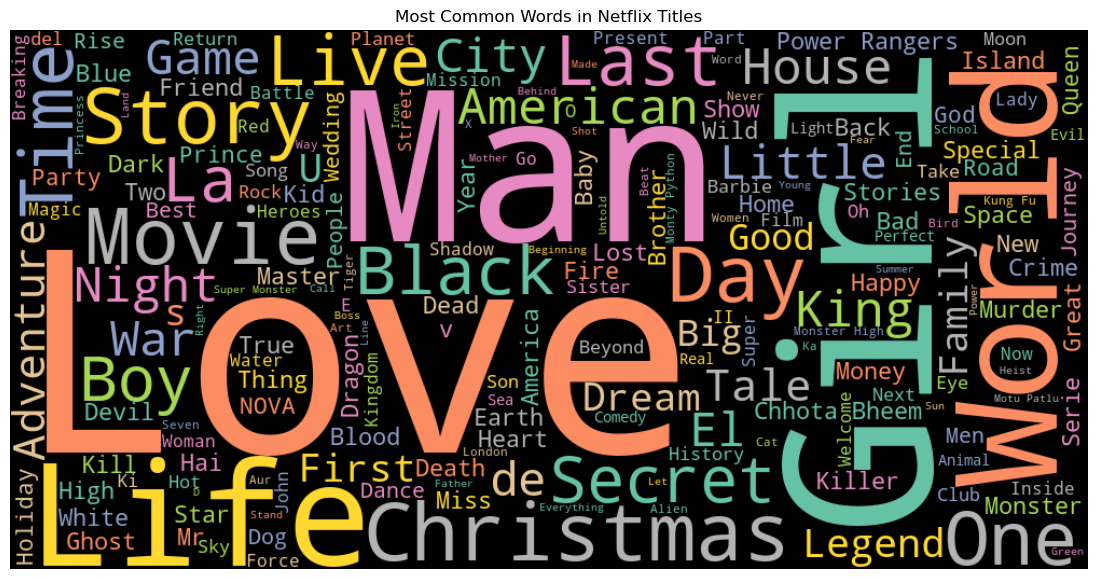

In [39]:
from wordcloud import WordCloud

text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set2').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Titles")
plt.savefig('../images/most_common_word.png')
plt.show()